In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whoscryinginyourroom","key":"36bbbc8019bc72532360dcad224b92f3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d whoscryinginyourroom/vehicle-datasets

 97% 83.0M/85.4M [00:01<00:00, 87.4MB/s]
100% 85.4M/85.4M [00:01<00:00, 55.8MB/s]


In [5]:
!unzip vehicle-datasets.zip

Archive:  vehicle-datasets.zip
  inflating: dataset/test/mobil/1002.jpg  
  inflating: dataset/test/mobil/1006.jpg  
  inflating: dataset/test/mobil/1012.jpg  
  inflating: dataset/test/mobil/1030.jpg  
  inflating: dataset/test/mobil/1032.jpg  
  inflating: dataset/test/mobil/1037.jpg  
  inflating: dataset/test/mobil/104.jpg  
  inflating: dataset/test/mobil/1053.jpg  
  inflating: dataset/test/mobil/1055.jpg  
  inflating: dataset/test/mobil/1057.jpg  
  inflating: dataset/test/mobil/1066.jpg  
  inflating: dataset/test/mobil/1075.jpg  
  inflating: dataset/test/mobil/1077.jpg  
  inflating: dataset/test/mobil/1082.jpg  
  inflating: dataset/test/mobil/1092.jpg  
  inflating: dataset/test/mobil/1093.jpg  
  inflating: dataset/test/mobil/1100.jpg  
  inflating: dataset/test/mobil/1105.jpg  
  inflating: dataset/test/mobil/1106.jpg  
  inflating: dataset/test/mobil/1110.jpg  
  inflating: dataset/test/mobil/1114.jpg  
  inflating: dataset/test/mobil/1115.jpg  
  inflating: dataset/tes

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define the model architecture
model = Sequential()

In [8]:
# Blok Konvolusi 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
# Membuat objek ImageDataGenerator untuk melakukan augmentasi gambar pada data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5],
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [12]:
# Membuat objek ImageDataGenerator untuk rescaling gambar pada data testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Menggunakan objek ImageDataGenerator untuk mempersiapkan data training dan testing
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['mobil', 'motor'])

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['mobil', 'motor'])

Found 2175 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [14]:
class_name = list(train_generator.class_indices.keys())
class_name

['mobil', 'motor']

In [15]:
class_name = ["motor", "mobil"]

In [16]:
# Melatih model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    shuffle=True,
    validation_steps=len(test_generator))

Epoch 1/15
68/68 [==============================] - 87s 866ms/step - loss: 0.7097 - accuracy: 0.6464 - val_loss: 0.5645 - val_accuracy: 0.7917
Epoch 2/15
68/68 [==============================] - 45s 660ms/step - loss: 0.6470 - accuracy: 0.6524 - val_loss: 0.5311 - val_accuracy: 0.7917
Epoch 3/15
68/68 [==============================] - 46s 671ms/step - loss: 0.6499 - accuracy: 0.6524 - val_loss: 0.5563 - val_accuracy: 0.7917
Epoch 4/15
68/68 [==============================] - 46s 670ms/step - loss: 0.6460 - accuracy: 0.6524 - val_loss: 0.5800 - val_accuracy: 0.7917
Epoch 5/15
68/68 [==============================] - 45s 654ms/step - loss: 0.6474 - accuracy: 0.6524 - val_loss: 0.5595 - val_accuracy: 0.7917
Epoch 6/15
68/68 [==============================] - 45s 659ms/step - loss: 0.6470 - accuracy: 0.6524 - val_loss: 0.5646 - val_accuracy: 0.7917
Epoch 7/15
68/68 [==============================] - 46s 673ms/step - loss: 0.6475 - accuracy: 0.6524 - val_loss: 0.5657 - val_accuracy: 0.7917

In [17]:
model.save('VGG16-Vehicle.h5')

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


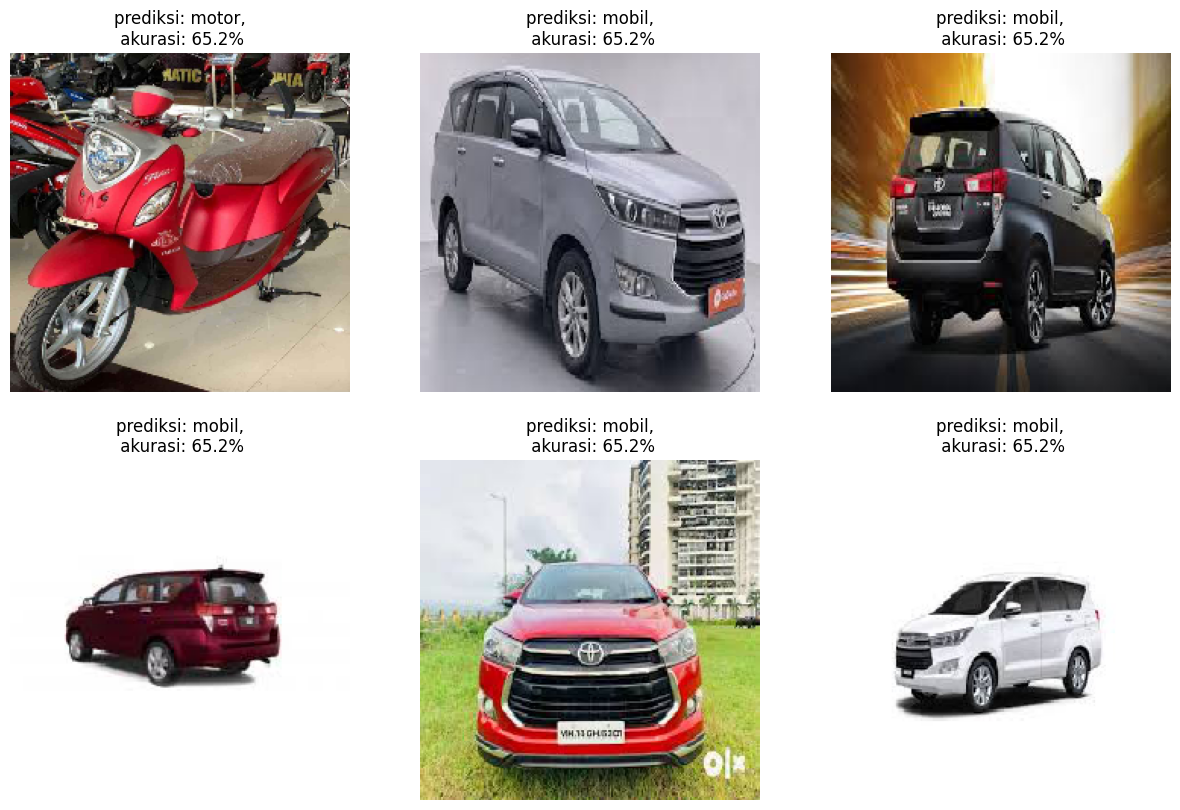

In [21]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i][0])] 
        plt.title(f"prediksi: {actual_class},\n akurasi: {confidence}%")
        plt.axis("off")
    break

Saving 333669871_8908990639174912_4070761804421342254_n.jpg to 333669871_8908990639174912_4070761804421342254_n.jpg
1/1 [==============================] - 0s 20ms/step


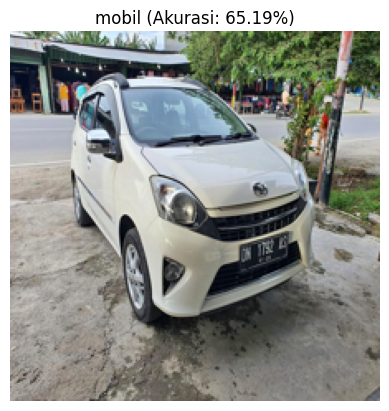

In [22]:
# Mengunggah gambar
uploaded_file = files.upload()

# Memprediksi kelas gambar
for file_name in uploaded_file.keys():
    img_path = file_name
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Menampilkan gambar dan label prediksi
    if prediction[0][0] > prediction[0][1]:
        label = 'mobil'
        accuracy = prediction[0][0] * 100
    else:
        label = 'motor'
        accuracy = prediction[0][1] * 100

    plt.imshow(img_array[0,:,:,:])
    plt.title(label + " (Akurasi: {:.2f}%)".format(accuracy))
    plt.axis('off')
    plt.show()